# Skin diseases classification using deep learning algorithm_

Deployed as Web App: https://github.com/riyaeliza123/Skin-Disease-Classification

# Import Libraries

In [32]:
import numpy as np
import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from keras.utils import np_utils
from keras.layers import Activation, Dropout, Conv2D, GlobalAveragePooling2D
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.applications.mobilenet
import os
import matplotlib.pyplot as plt
# Imports
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

In [33]:
IMG_SAVE_PATH = r'/kaggle/input/skin-disease-classification-image-dataset/Split_smol/train' 
IMG_HEIGHT, IMG_WIDTH = 240, 240
NUM_CLASSES = 9
BATCH_SIZE = 32

In [34]:
# Dictionary mapping skin disease names to integer labels

Str_to_Int = {
    'Actinic keratosis': 0,
    'Atopic Dermatitis': 1,
    'Benign keratosis': 2,
    'Dermatofibroma': 3,
    'Melanocytic nevus': 4,
    'Melanoma':5,
    'Squamous cell carcinoma': 6,
    'Tinea Ringworm Candidiasis':7,
    'Vascular lesion': 8
}

def str_to_Int_mapper(val):
    """
    Function to convert string labels to integer labels.
    
    Args:
    val (str): The string label of a skin disease.
    
    Returns:
    int: The corresponding integer label for the skin disease.
    
    Example:
    >>> str_to_Int_mapper('Melanoma')
    5
    """
    return Str_to_Int[val]

# This function will be used to convert string labels in our dataset
# to their corresponding integer labels, making the data suitable
# for training our machine learning model.

# Data Preprocessing


In [35]:
"""
 Note: This preprocessing step ensures that all images are:
 1. In RGB format
 2. Resized to 240x240 pixels
 3. Normalized to have pixel values between 0 and 1

 dataset is a list of lists where each inner list contains processed image as a numpy array of shape (240, 240, 3) with values between 0 and 1
 and the string directory name
"""

import PIL  # Python Imaging Library for opening and manipulating images
import cv2  # OpenCV library for computer vision tasks

# Initialize an empty list to store processed images and their labels
dataset = []

# Iterate through all directories in the image save path
for directory in os.listdir(IMG_SAVE_PATH):
    # Construct the full path to the current directory
    path = os.path.join(IMG_SAVE_PATH, directory)
    
    # Iterate through all images in the current directory
    for image in os.listdir(path):
        # Construct the full path to the current image
        new_path = os.path.join(path, image)
        
        try:
            # Open the image using PIL
            # Convert image to RGB format
            # This ensures consistency, as some images might be in different color formats       
            img = PIL.Image.open(new_path).convert('RGB')
            
     
            # Convert PIL image to numpy array
            # This allows us to perform numerical operations on the image data
            img = np.asarray(img)
            
            # Resize the image to 240x240 pixels
            # This ensures all images have the same dimensions, which is necessary for our neural network
            img = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH))
            # Normalize pixel values to be between 0 and 1
            # This is a common preprocessing step that can help with model training
            img = img/255.0
            
            # Append the processed image and its label (directory name) to our dataset
            dataset.append([img, directory]) 
            
        except FileNotFoundError:
            # Handle cases where an image file might be missing
            print('Image file not found. Skipping...')


Number of images in each class:
Actinic keratosis: 80
Atopic Dermatitis: 81
Benign keratosis: 80
Dermatofibroma: 80
Melanocytic nevus: 80
Melanoma: 80
Squamous cell carcinoma: 80
Tinea Ringworm Candidiasis: 56
Vascular lesion: 80


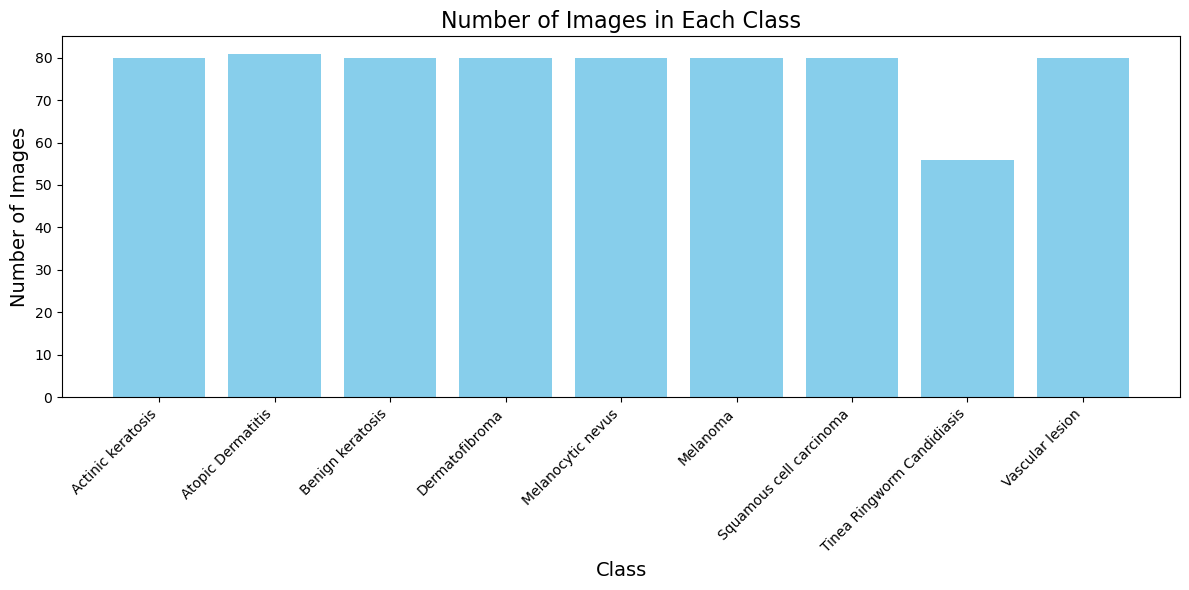

In [36]:
import os
import matplotlib.pyplot as plt

# Initialize a dictionary to store the count of images in each class
class_counts = {}

# Iterate through all directories in the dataset
for directory in os.listdir(IMG_SAVE_PATH):
    # Construct the path to the current directory
    path = os.path.join(IMG_SAVE_PATH, directory)
    
    # Count the number of images in the current directory
    if os.path.isdir(path):
        class_counts[directory] = len(os.listdir(path))

# Sort the class counts by class name (optional, for ordered visualization)
class_counts = dict(sorted(class_counts.items()))

# Print the class counts
print("Number of images in each class:")
for cls, count in class_counts.items():
    print(f"{cls}: {count}")

# Visualize the class distribution using a bar plot
plt.figure(figsize=(12, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xlabel('Class', fontsize=14)
plt.ylabel('Number of Images', fontsize=14)
plt.title('Number of Images in Each Class', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [37]:
to_categorical(6)

array([0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [38]:
# Separate the processed images and their labels
data, labels = zip(*dataset)
# 'data' now contains all the processed images
# 'labels' contains the corresponding disease names (strings)

# Convert string labels to integer labels
temp = list(map(str_to_Int_mapper, labels))
# 'temp' now contains integer representations of the labels
# For example, 'Melanoma' might become 5

# Import keras for one-hot encoding
import keras

# Convert integer labels to one-hot encoded format
labels = keras.utils.to_categorical(temp)
# 'labels' is now a 2D array where each row is a one-hot encoded label
# For example, if we have 9 classes, the label 5 would become:
# [0, 0, 0, 0, 0, 1, 0, 0, 0]


In [39]:
# Check if all images have the correct shape
count = 0
for i in data:
    if i.shape != (240, 240, 3):
        count = count + 1
print(count)
# This loop checks each image in 'data'
# If any image doesn't have the shape (240, 240, 3), it increments the count
# Finally, it prints the number of images with incorrect shape

# After this code block:
# - 'data' is a list of numpy arrays, each representing a processed image
# - 'labels' is a 2D numpy array of one-hot encoded labels
# - We know how many images (if any) have an unexpected shape


# Note: 
# - The shape (240, 240, 3) means:
#   240 pixels high, 240 pixels wide, and 3 color channels (RGB)
# - One-hot encoding is used because many machine learning models
#   work better with this format for categorical data

0


In [40]:
classes = ['Actinic keratosis','Atopic Dermatitis','Benign keratosis','Dermatofibroma','Melanocytic nevus', 'Melanoma','Squamous cell carcinoma',  'Tinea Ringworm Candidiasis','Vascular lesion']


data shape: (697, 240, 240, 3)
Shape of the labels: (697, 9)
one hot encoded format of first image: [0. 0. 0. 0. 0. 0. 0. 1. 0.]
class of first image: Tinea Ringworm Candidiasis


Text(0.5, 1.0, 'Tinea Ringworm Candidiasis')

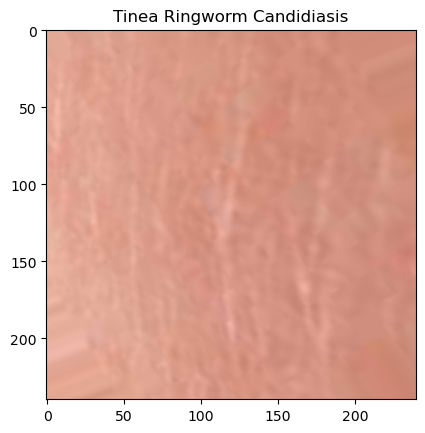

In [41]:
#data is a list of numpy arrays of the processed images

print("data shape:",np.array(data).shape)
print("Shape of the labels:",labels.shape)
print("one hot encoded format of first image:",labels[1])
print("class of first image:",classes[np.argmax(labels[1])])
plt.imshow(data[1])
plt.title(classes[np.argmax(labels[1])])


In [42]:
# Check if all images have the correct shape
count = 0
for i in data:
    if i.shape != (240, 240, 3):
        count = count + 1
print(count)
# This loop checks each image in 'data'
# If any image doesn't have the shape (240, 240, 3), it increments the count
# Finally, it prints the number of images with incorrect shape


# After this code block:
# - 'data' is a list of numpy arrays, each representing a processed image
# - 'labels' is a 2D numpy array of one-hot encoded labels
# - We know how many images (if any) have an unexpected shape

# Note: 
# - The shape (240, 240, 3) means:
#   240 pixels high, 240 pixels wide, and 3 color channels (RGB)
# - One-hot encoding is used because many machine learning models
#   work better with this format for categorical data

0


##### Compute weights for classes to account for the data imbalance

In [43]:
"""
# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(labels.argmax(axis=1)),
    y=labels.argmax(axis=1)
)
class_weights = {i: weight for i, weight in enumerate(class_weights)}
print(class_weights)

"""

"\n# Compute class weights\nclass_weights = compute_class_weight(\n    class_weight='balanced',\n    classes=np.unique(labels.argmax(axis=1)),\n    y=labels.argmax(axis=1)\n)\nclass_weights = {i: weight for i, weight in enumerate(class_weights)}\nprint(class_weights)\n\n"

In [44]:
"""
# Data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 20% validation split
)

train_generator = train_datagen.flow(
    data,
    labels,
    batch_size=BATCH_SIZE,
    subset='training'
)

validation_generator = train_datagen.flow(
    data,
    labels,
    batch_size=BATCH_SIZE,
    subset='validation'
)

"""



"\n# Data augmentation\ntrain_datagen = ImageDataGenerator(\n    rotation_range=30,\n    width_shift_range=0.2,\n    height_shift_range=0.2,\n    shear_range=0.2,\n    zoom_range=0.2,\n    horizontal_flip=True,\n    fill_mode='nearest',\n    validation_split=0.2  # 20% validation split\n)\n\ntrain_generator = train_datagen.flow(\n    data,\n    labels,\n    batch_size=BATCH_SIZE,\n    subset='training'\n)\n\nvalidation_generator = train_datagen.flow(\n    data,\n    labels,\n    batch_size=BATCH_SIZE,\n    subset='validation'\n)\n\n"

# DenseNet

In [45]:
# Create a base model using DenseNet121
densenet = DenseNet121(
    weights='imagenet',  # Use weights pre-trained on ImageNet dataset
    include_top=False,   # Don't include the final classification layers
    input_shape=(240,240,3)  # Specify input image size and channels
)

# Define a function to build our complete model
def build_densenet():
    
    # Create a Sequential model (layer-by-layer)
    model = Sequential()
    
    # Add the base DenseNet model
    model.add(densenet)
    
    # Add a Global Average Pooling layer
    model.add(layers.GlobalAveragePooling2D())
    
    # Add a Dropout layer to prevent overfitting
    model.add(layers.Dropout(0.5))
    
    # Add the final Dense layer for classification
    model.add(layers.Dense(9, activation='sigmoid'))
    
    # Compile the model
    model.compile(
        loss='binary_crossentropy',  # Loss function for multi-label classification
        optimizer=Adam(learning_rate=0.00005),  # Optimization algorithm
        metrics=['accuracy']  # Metric to track during training
    )
    
    return model
    

In [46]:
model = build_densenet()
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 9)                 9225      
                                                                 
Total params: 7,046,729
Trainable params: 6,963,081
Non-trainable params: 83,648
_________________________________________________________________


In [47]:
# Model Training

history = model.fit(
    np.array(data),          # Input data (images)
    np.array(labels),        # Target labels
    epochs=5,                # Number of times to iterate over the entire dataset
    shuffle=True,            # Shuffle the data before each epoch
    validation_split=0.2     # Use 20% of the data for validation
)


Epoch 1/5
18/18 [==============================] - 82s 780ms/step - loss: 0.9191 - accuracy: 0.1490 - val_loss: 0.8474 - val_accuracy: 0.0214
Epoch 2/5
18/18 [==============================] - 8s 440ms/step - loss: 0.6482 - accuracy: 0.3896 - val_loss: 0.7952 - val_accuracy: 0.0429
Epoch 3/5
18/18 [==============================] - 8s 450ms/step - loss: 0.4823 - accuracy: 0.5745 - val_loss: 0.7196 - val_accuracy: 0.1214
Epoch 4/5
18/18 [==============================] - 8s 464ms/step - loss: 0.3865 - accuracy: 0.6607 - val_loss: 0.6439 - val_accuracy: 0.2357
Epoch 5/5
18/18 [==============================] - 9s 477ms/step - loss: 0.3048 - accuracy: 0.7630 - val_loss: 0.5789 - val_accuracy: 0.3143


In [48]:
import seaborn as sns
from matplotlib import pyplot
    
def plot_acc(history):
    sns.set()

    fig = pyplot.figure(0, (12, 4))

    ax = pyplot.subplot(1, 2, 1)
    sns.lineplot(x=history.epoch, y=history.history['accuracy'], label='train')
    sns.lineplot(x=history.epoch, y=history.history['val_accuracy'], label='valid')
    pyplot.title('Accuracy')
    pyplot.tight_layout()

    ax = pyplot.subplot(1, 2, 2)
    sns.lineplot(x=history.epoch, y=history.history['loss'], label='train')
    sns.lineplot(x=history.epoch, y=history.history['val_loss'], label='valid')
    pyplot.title('Loss')
    pyplot.tight_layout()

    pyplot.show()

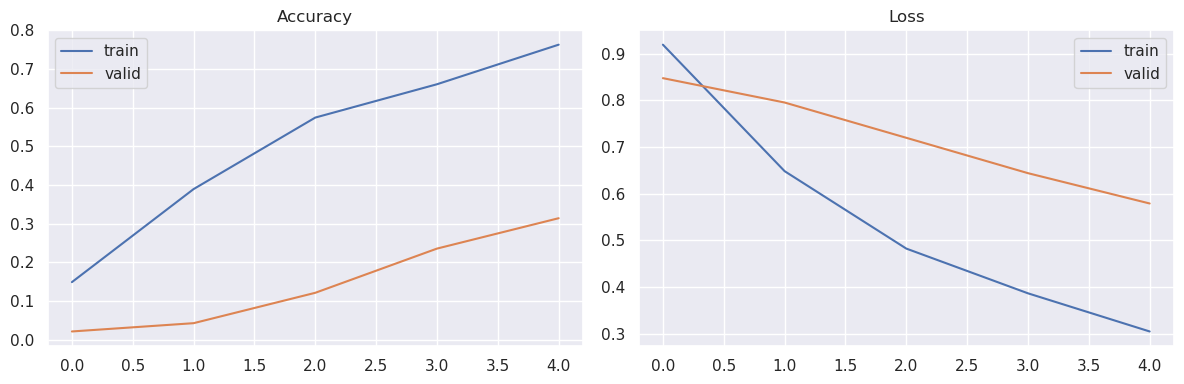

In [49]:
plot_acc(history)

# Mobilenet

In [50]:
# MobileNet Model Setup for Skin Disease Classification

def mobilenet():

    model = Sequential([
        # Base MobileNet model
        tf.keras.applications.mobilenet.MobileNet(
            input_shape=(240,240, 3),  # Input image size: 240x240 pixels, 3 color channels
            include_top=False  # Exclude the final classification layers
        ),
        
        # Additional layers
        Dropout(0.5),  # Randomly drop 50% of inputs to prevent overfitting
        Conv2D(9, (1, 1), padding='valid'),  # Add a 1x1 convolution with 9 filters (one per class)
        Activation('relu'),  # ReLU activation function
        GlobalAveragePooling2D(),  # Reduce spatial dimensions
        Activation('softmax')  # Final activation for multi-class classification
    ])
    return model

        

In [51]:
# Create an instance of the MobileNet model
model_mobile = mobilenet()

# Compile the model
model_mobile.compile(
    optimizer=Adam(learning_rate=0.0001),  # Adam optimizer with a small learning rate
    loss='categorical_crossentropy',  # Loss function for multi-class classification
    metrics=['accuracy']  # Track accuracy during training
)

# Print a summary of the model's architecture
model_mobile.summary()

17225924/17225924 [==============================] - 0s 0us/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 1024)        0         
                                                                 
 conv2d (Conv2D)             (None, 7, 7, 9)           9225      
                                                                 
 activation (Activation)     (None, 7, 7, 9)           0         
                                                                 
 global_average_pooling2d_1   (None, 9)                0         
 (GlobalAveragePooling2D)                                        
                                                       

In [52]:
history_mobile=model_mobile.fit(np.array(data), np.array(labels), epochs = 5, shuffle = True, validation_split = 0.3)

Epoch 1/5


2024-12-21 09:16:58.963667: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_3/dropout_1/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


16/16 [==============================] - 16s 307ms/step - loss: 1.6936 - accuracy: 0.4086 - val_loss: 3.3520 - val_accuracy: 0.0095
Epoch 2/5
16/16 [==============================] - 3s 186ms/step - loss: 0.5481 - accuracy: 0.8337 - val_loss: 4.2008 - val_accuracy: 0.0000e+00
Epoch 3/5
16/16 [==============================] - 3s 189ms/step - loss: 0.2633 - accuracy: 0.9261 - val_loss: 4.3192 - val_accuracy: 0.0048
Epoch 4/5
16/16 [==============================] - 3s 190ms/step - loss: 0.1252 - accuracy: 0.9856 - val_loss: 4.1258 - val_accuracy: 0.0190
Epoch 5/5
16/16 [==============================] - 3s 192ms/step - loss: 0.0896 - accuracy: 0.9918 - val_loss: 4.0363 - val_accuracy: 0.0714


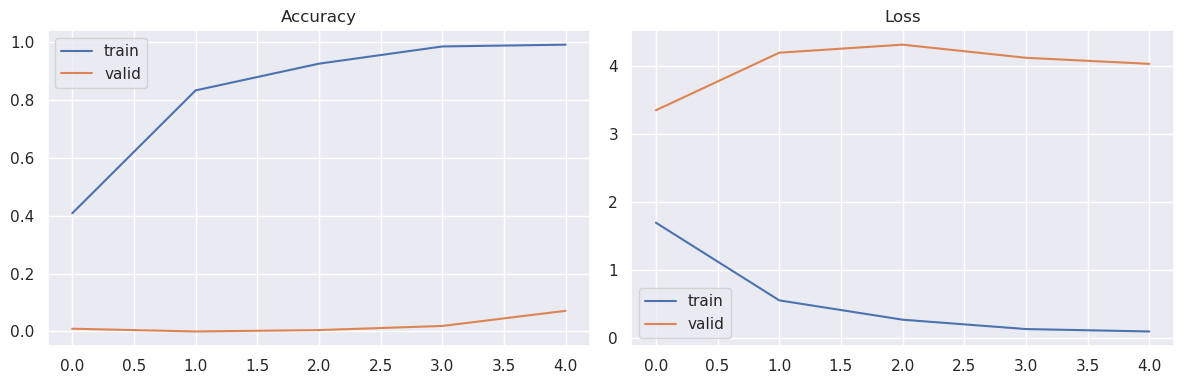

In [53]:
plot_acc(history_mobile)

# Save model

In [54]:
# Save DenseNet model
model.save("skin_disease_model_densenet.h5")

# Save MobileNet model
model_mobile.save("skin_disease_model_mobilenet.h5")

print("Models saved successfully.")

# To load the models later:
from tensorflow.keras.models import load_model

"""
Explanation:

1. model.save(): This function saves the entire model architecture, weights, and training configuration.
   The .h5 format is commonly used as it can store large amounts of numerical data.

2. load_model(): This function loads a saved model, including its architecture and weights.

Benefits of saving models:
- You can use the trained model later without having to retrain it.
- You can share the model with others or deploy it in different environments.
- It allows for version control of your models.

Best practices:
- Save models after significant improvements in performance.
- Include the date or version number in the filename for better tracking.
- Consider saving checkpoints during training for long-running models.

Note: Ensure you have write permissions in the directory where you're saving the models.
"""


Models saved successfully.


"\nExplanation:\n\n1. model.save(): This function saves the entire model architecture, weights, and training configuration.\n   The .h5 format is commonly used as it can store large amounts of numerical data.\n\n2. load_model(): This function loads a saved model, including its architecture and weights.\n\nBenefits of saving models:\n- You can use the trained model later without having to retrain it.\n- You can share the model with others or deploy it in different environments.\n- It allows for version control of your models.\n\nBest practices:\n- Save models after significant improvements in performance.\n- Include the date or version number in the filename for better tracking.\n- Consider saving checkpoints during training for long-running models.\n\nNote: Ensure you have write permissions in the directory where you're saving the models.\n"

In [55]:
from IPython.display import FileLink

# For MobileNet model 
FileLink('skin_disease_model_mobilenet.h5')


/kaggle/working/skin_disease_model_mobilenet.h5

In [56]:
# For DenseNet model
FileLink('skin_disease_model_densenet.h5')

/kaggle/working/skin_disease_model_densenet.h5

# Evaluate Models

In [57]:
import PIL
import cv2
# Define path to test dataset
IMG_SAVE_PATH_TESTING = r'/kaggle/input/skin-disease-classification-image-dataset/Split_smol/val'

# Prepare test dataset
dataset_testing = []
for directory in os.listdir(IMG_SAVE_PATH_TESTING):
    path = os.path.join(IMG_SAVE_PATH_TESTING, directory)
    for image in os.listdir(path):
        new_path = os.path.join(path, image)
        try:
            imgpath = PIL.Image.open(new_path)
            imgpath = imgpath.convert('RGB')
            img = np.asarray(imgpath)
            img = cv2.resize(img, (240, 240))
            img = img / 255.  # Normalize pixel values
            dataset_testing.append([img, directory])
        except Exception as e:
            print(f"Error processing image {new_path}: {str(e)}")

In [60]:
# Separate images and labels
testing_data, testing_labels = zip(*dataset_testing)

# Convert string labels to integers
testing_temp = list(map(str_to_Int_mapper, testing_labels))

In [61]:
# Convert labels to one-hot encoding
testing_labels = to_categorical(testing_temp)

# Convert data to numpy arrays
testing_data = np.array(testing_data)
testing_labels = np.array(testing_labels)


# Evaluate DenseNet model
print("Evaluating DenseNet model...")
densenet_loss, densenet_accuracy = model.evaluate(testing_data, testing_labels, verbose=1)
print(f"DenseNet - Test accuracy: {densenet_accuracy:.4f}, Test loss: {densenet_loss:.4f}")

# Evaluate MobileNet model
print("\nEvaluating MobileNet model...")
mobilenet_loss, mobilenet_accuracy = model_mobile.evaluate(testing_data, testing_labels, verbose=1)
print(f"MobileNet - Test accuracy: {mobilenet_accuracy:.4f}, Test loss: {mobilenet_loss:.4f}")

Evaluating DenseNet model...
6/6 [==============================] - 1s 108ms/step - loss: 0.6543 - accuracy: 0.4917
DenseNet - Test accuracy: 0.4917, Test loss: 0.6543

Evaluating MobileNet model...
6/6 [==============================] - 0s 40ms/step - loss: 1.9639 - accuracy: 0.4641
MobileNet - Test accuracy: 0.4641, Test loss: 1.9639


# Prediction

Generating predictions and confusion matrix for DenseNet...
6/6 [==============================] - 2s 99ms/step


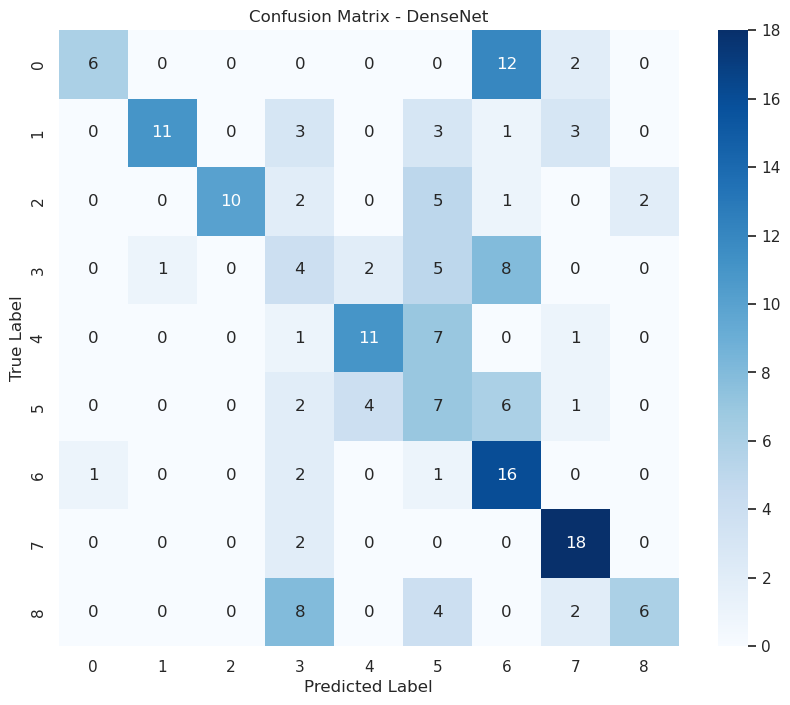


Generating predictions and confusion matrix for MobileNet...
6/6 [==============================] - 1s 39ms/step


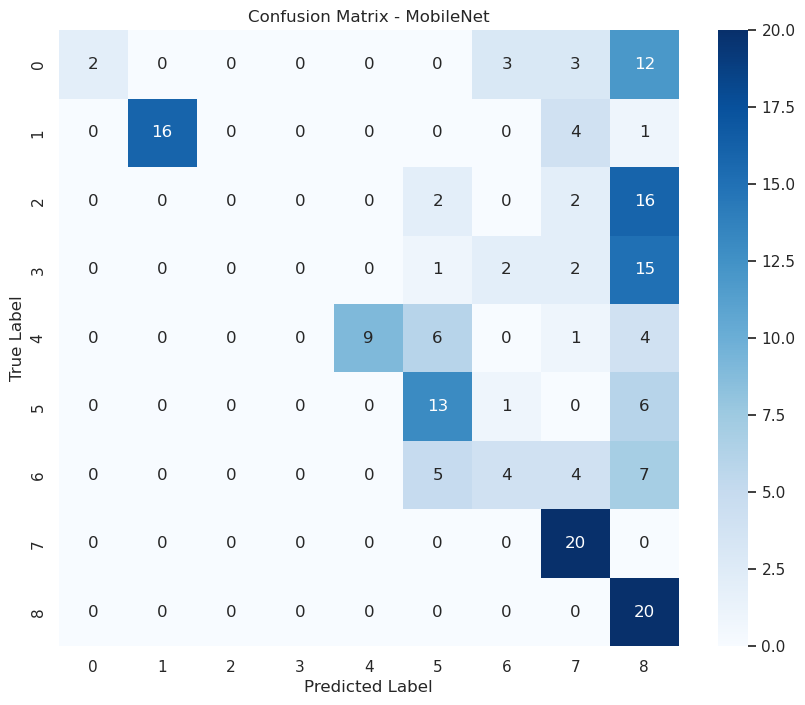

In [62]:
# Prediction and Confusion Matrix Generation

import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, model_name):
    # Create confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

def make_predictions(model, data, labels, model_name):
    # Make predictions
    predictions = model.predict(data)
    
    # Convert predictions and true labels from one-hot encoding to class labels
    y_pred = np.argmax(predictions, axis=1)
    y_true = np.argmax(labels, axis=1)
    
    # Plot confusion matrix
    plot_confusion_matrix(y_true, y_pred, model_name)
    
    return y_true, y_pred


# Make predictions and plot confusion matrices for each model
print("Generating predictions and confusion matrix for DenseNet...")
densenet_true, densenet_pred = make_predictions(model, testing_data, testing_labels, "DenseNet")

print("\nGenerating predictions and confusion matrix for MobileNet...")
mobilenet_true, mobilenet_pred = make_predictions(model_mobile, testing_data, testing_labels, "MobileNet")